In [124]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [125]:
chem = "./Okafor25.yaml"
gas = ct.Solution(chem)
n_species = gas.n_species

In [126]:
res_r = np.load('dataset.npy')
res_cfd = np.load('dataset_cfd.npy')
formation_enthalpies = np.load('formation_enthalpies.npy')
print(res_r.shape)
print(res_cfd.shape)

(25645, 104)
(166671, 104)


In [127]:
# randomset = res[np.random.choice(res.shape[0], 500000)]
# flame1dset = res_cfd[np.random.choice(res_cfd.shape[0], 20000)]
randomset = res_r
flame1dset = res_cfd
randomset.shape

(25645, 104)

In [128]:
randomset_list = []
for i in range(randomset.shape[0]):
    if (randomset[i, 0] > 500 and randomset[i, 2+2*n_species] < 2600 and randomset[i, 2+2*n_species] < 2600 and randomset[i, 1] < 106000 and randomset[i, 3+2*n_species] < 106000):
        randomset_list.append(randomset[i, :])

randomset_list = np.array(randomset_list)
randomset_list.shape
# len(randomset_list)
# randomset_list[0]

(25645, 104)

In [129]:
print(np.min(res_cfd[:,1]))
print(np.mean(res_cfd[:,1]))
print(np.max(res_cfd[:,1]))
print(np.min(res_r[:,1]))
print(np.mean(res_r[:,1]))
print(np.max(res_r[:,1]))
print(np.min(res_cfd[:,0]))
print(np.mean(res_cfd[:,0]))
print(np.max(res_cfd[:,0]))
print(np.min(res_r[:,0]))
print(np.mean(res_r[:,0]))
print(np.max(res_r[:,0]))
print(np.min(res_cfd[:,n_species+1]))
print(np.mean(res_cfd[:,n_species+1]))
print(np.max(res_cfd[:,n_species+1]))
print(np.min(res_r[:,n_species+1]))
print(np.mean(res_r[:,n_species+1]))
print(np.max(res_r[:,n_species+1]))
print(np.min(res_cfd[:,n_species]))
print(np.mean(res_cfd[:,n_species]))
print(np.max(res_cfd[:,n_species]))
print(np.min(res_r[:,n_species]))
print(np.mean(res_r[:,n_species]))
print(np.max(res_r[:,n_species]))

101394.0
101688.71185149185
101744.0
100499.71019728026
101664.78659418042
102701.29964010502
510.003
1882.9517962512978
2308.62
500.0332341984992
1694.0546125517196
2399.8434576621858
0.0
8.378368203539177e-05
0.00033455098092467257
0.0
0.00010056722704689172
0.0007423981737464138
0.677072059713153
0.7459043576327121
0.7651994783697443
0.6143242033724327
0.7356643879907926
0.8076401889717446


In [130]:
print(res_r[res_r[:,1]<101425].shape)
# print(np.max(res_r[res_r[:,1]>105378][:,0]))
# print(np.mean(res_r[res_r[:,1]>105378][:,0]))
# print(np.min(res_r[res_r[:,1]>105378][:,0]))


(9692, 104)


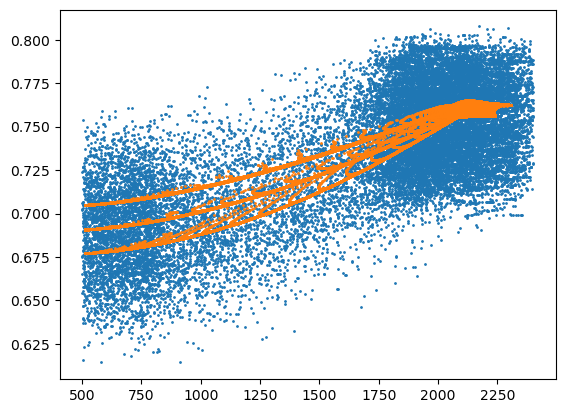

In [131]:
plt.scatter(randomset[:,0], randomset[:,n_species], s=1)
plt.scatter(flame1dset[:,0], flame1dset[:,n_species], s=1)

In [132]:
# plt.scatter(np.arange(randomset.shape[0]), randomset[:,0], s=1)
# plt.scatter(np.arange(flame1dset.shape[0]), flame1dset[:,0], s=1)

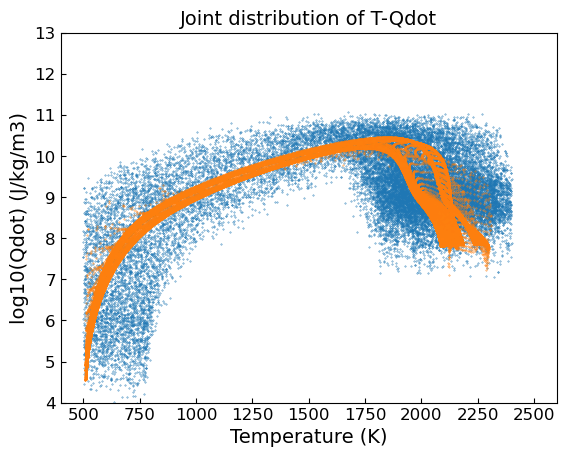

In [133]:
qdot_r = -(formation_enthalpies*(randomset[:,4+2*n_species:4+3*n_species]-randomset[:,2:2+n_species])/1e-7).sum(axis=1)
qdot1 = -(formation_enthalpies*(flame1dset[:,4+2*n_species:4+3*n_species]-flame1dset[:,2:2+n_species])/1e-7).sum(axis=1)

plt.scatter(randomset[:,0], qdot_r/abs(qdot_r)*np.log10(abs(qdot_r)), s=0.1)
plt.scatter(flame1dset[:,0], qdot1/abs(qdot1)*np.log10(abs(qdot1)), s=0.1)

plt.ylim((4, 13))
plt.xlim((400, 2600))
plt.xlabel('Temperature (K)', fontsize=14)  # 设置坐标轴标签字号
plt.ylabel('log10(Qdot) (J/kg/m3)', fontsize=14)  # 设置坐标轴标签字号
plt.title('Joint distribution of T-Qdot', fontsize=14)  # 设置标题字号
plt.tick_params(axis='both', which='both', direction='in', labelsize=12)

In [134]:
print(np.min(qdot_r))
print(np.mean(qdot_r))
print(np.max(qdot_r))
print(np.min(qdot1))
print(np.mean(qdot1))
print(np.max(qdot1))
np.shape(qdot1[qdot1[:]<-1e8])

10024.226544231144
7076349781.462916
119850841745.85
-54057702.42872143
1974383165.444445
29022690902.508297


(0,)

In [135]:
print(np.mean(qdot_r[qdot_r[:]<1e10]))
print(qdot_r[qdot_r[:]<1e10].shape)
print(np.mean(qdot_r[qdot_r[:]>1e10]))
print(qdot_r[qdot_r[:]>1e10].shape)

1758150015.2956235
(20477,)
28148481478.794117
(5168,)


In [136]:
h_r = (randomset[:,4+2*n_species:4+3*n_species]*randomset[:,4+3*n_species:4+4*n_species]-randomset[:,2:2+n_species]*randomset[:,2+n_species:2+2*n_species]).sum(axis=1)
h_cfd =  (flame1dset[:,4+2*n_species:4+3*n_species]*flame1dset[:,4+3*n_species:4+4*n_species]-flame1dset[:,2:2+n_species]*flame1dset[:,2+n_species:2+2*n_species]).sum(axis=1)

print(np.min(h_r))
print(np.mean(h_r))
print(np.max(h_r))
print(np.min(h_cfd))
print(np.mean(h_cfd))
print(np.max(h_cfd))

-1.1620680692159269e-06
3.2761886001191634e-06
0.08402712276438251
-5.16253361837471e-07
5.436374390207634e-07
0.05223600850288346


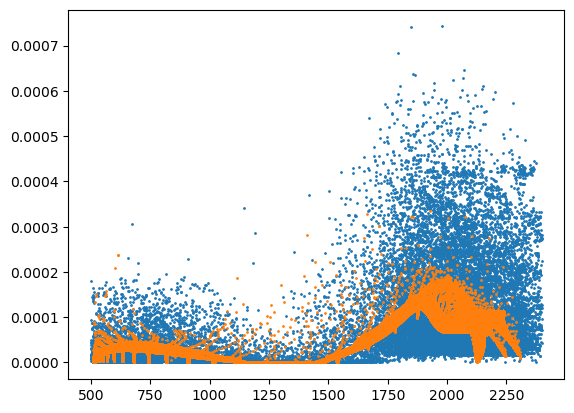

In [137]:
plt.scatter(randomset[:,0], randomset[:,n_species+1], s=1)
plt.scatter(flame1dset[:,0], flame1dset[:,n_species+1], s=1)

In [138]:
# res_hit = np.load('dataset_hit.npy')
# plt.scatter(np.arange(randomset.shape[0]), randomset[:,0], s=1)
# plt.scatter(np.arange(res_hit.shape[0]), res_hit[:,0], s=1)

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_hit.npy'

In [ ]:
# qdot_r = -(formation_enthalpies*(randomset[:,4+2*n_species:4+3*n_species]-randomset[:,2:2+n_species])/1e-6).sum(axis=1)
# qdot3 = -(formation_enthalpies*(res_hit[:,4+2*n_species:4+3*n_species]-res_hit[:,2:2+n_species])/1e-6).sum(axis=1)
# plt.scatter(randomset[:,0], np.log10(qdot_r), s=0.001)
# plt.scatter(res_hit[:,0], np.log10(qdot3), s=0.001)
# plt.ylim((5, 12))
# plt.xlabel('Temperature (K)')
# plt.ylabel('log10(Qdot) (J/kg/m3)')
# plt.title('Joint distribution of T-Qdot')
# plt.legend()

NameError: name 'res_hit' is not defined

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


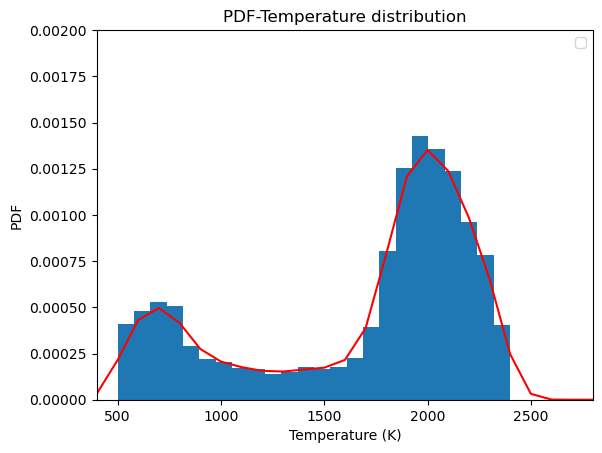

In [139]:
import scipy.stats as stats

Temp = randomset[:,0]

kde = stats.gaussian_kde(Temp)

x_pts = np.linspace(400, 2800, 25)

estimated_pdf = kde.evaluate(x_pts)

plt.figure()
plt.hist(Temp, bins=24, density=1.0)
plt.plot(x_pts, estimated_pdf, color="r")
plt.ylim((0, 0.002))
plt.xlim((400, 2800))
plt.xlabel('Temperature (K)')
plt.ylabel('PDF')
plt.title('PDF-Temperature distribution')
plt.legend()
plt.show()


In [ ]:
# Temp = np.log10(qdot)

# kde = stats.gaussian_kde(Temp)

# x_pts = np.linspace(4, 12, 9)

# estimated_pdf = kde.evaluate(x_pts)

# plt.figure()
# plt.hist(Temp, bins=24, density=1.0)
# plt.plot(x_pts, estimated_pdf, color="r")
# plt.ylim((0, 1))
# plt.xlim((4, 12))
# plt.xlabel('log10(Qdot) (J/kg/m3)')
# plt.ylabel('PDF')
# plt.title('PDF-Qdop distribution')
# plt.legend()
# plt.show()

NameError: name 'qdot' is not defined

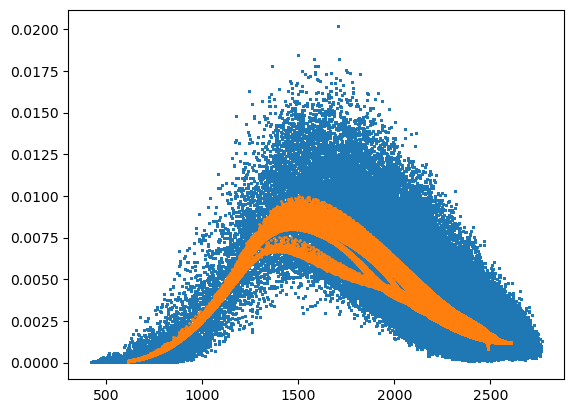

In [ ]:
# plt.scatter(randomset[:,0], randomset[:,-1], s=1)
# plt.scatter(res_hit[:,0], res_hit[:,-1], s=1)

In [ ]:
# loss = np.array([10, 100, 1000, 10000, 100000])
loss = np.load('loss.npy')
print(loss.shape)
loss[1]
plt.scatter(range(loss.shape[0]), np.log10(loss), s=1)
plt.xlabel('Epoch')
plt.ylabel('log10(total_loss)')
plt.title('Train log loss')
plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'loss.npy'

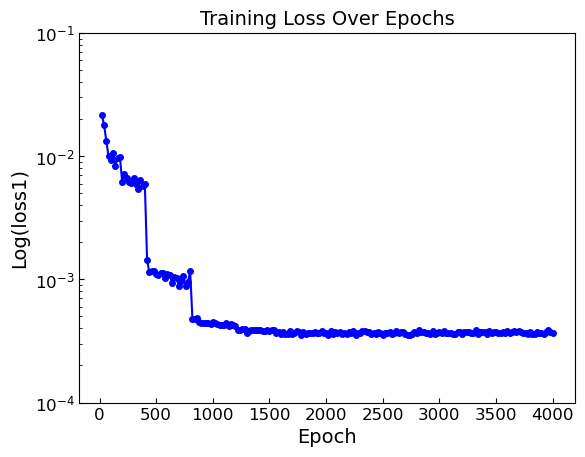

In [ ]:
import re
import numpy as np

# 读取文本文件
with open('log.training', 'r') as file:
    data = file.read()

# 使用正则表达式提取epoch和loss数据
# epoch_pattern = r'epoch:\s*([\d.]+)'
# loss1_pattern = r'loss1:\s*([\d.]+)'

# epochs = np.array([float(match.group(1)) for match in re.finditer(epoch_pattern, data)])
# loss1 = np.array([float(match.group(1)) for match in re.finditer(loss1_pattern, data)])
epoch_pattern = r'epoch:(\d+) , loss1:([\d.]+e[-+]\d+)'
matches = re.findall(epoch_pattern, data)

epochs = np.array([int(match[0]) for match in matches])
loss1 = np.array([float(match[1]) for match in matches])

# print("Epochs:", epochs)
# print("Loss1:", loss1[-1])
# plt.scatter(epochs, np.log10(loss1), s=1)
# plt.xlabel('Epoch')
# plt.ylabel('log10(loss)')
# plt.title('Train log(loss)')
# plt.legend()

# plt.figure(figsize=(8, 6))
plt.semilogy(epochs, loss1, marker='o', linestyle='-', color='b', markersize=4)
plt.xlabel('Epoch', fontsize=14)  # 设置坐标轴标签字号
plt.ylabel('Log(loss1)', fontsize=14)  # 设置坐标轴标签字号
plt.title('Training Loss Over Epochs', fontsize=14)  # 设置标题字号
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.tight_layout()
# plt.xticks(fontsize=12, rotation=45, direction='in')
# plt.yticks(fontsize=12, direction='in')
plt.tick_params(axis='both', which='both', direction='in', labelsize=12)
plt.ylim((1e-4, 1e-1))
# 保存图表
plt.savefig('training_loss_plot.png')

# 显示图表
plt.show()